In [1]:
import randomwalk as rw
import numpy as np
import matplotlib.pyplot as plt

# CW10 : Monte Carlo Techniques

The word "Monte Carlo" is a fancy term for what essentially means "using random numbers." Since computers are good at generating (pseudo)random numbers quickly, it can be advantageous to use this randomness for simulations. In this notebook, you will explore a few interesting examples of this idea.

## Estimating $\pi$
As a simple example, consider the following technique for computing the number $\pi$:
  - Area of a unit circle : $\pi$
  - Area of a the minimum box that fits the unit circle, with side length 2 : $4$
  - Fraction of area of the box taken up by the unit circle: $\pi/4$
  - Therefore: If one finds the fraction of random points that uniformly cover such a box that fall inside the unit circle, then multiplying this fraction by 4 will yield $\pi$.

Let's test this idea:

In [2]:
def estimate_pi(N=100000):
    # Generate N random x and y coordinates within the box with sides from [-2,2]
    xs = np.random.uniform(-1,1,N)
    ys = np.random.uniform(-1,1,N)
    # Count how many points lie within the unit circle
    circle = np.where(xs**2 + ys**2 < 1, 1, 0).sum()
    # Compute pi
    return 4 * circle / N

In [3]:
for N in [10, 100, 1000, 10000, 100000, 1000000, 10000000]:
    print("N=",N, " : pi=", estimate_pi(N))

N= 10  : pi= 1.6
N= 100  : pi= 3.08
N= 1000  : pi= 3.148
N= 10000  : pi= 3.1532
N= 100000  : pi= 3.14056
N= 1000000  : pi= 3.140964


N= 10000000  : pi= 3.141104


Not bad for such a simple idea!

## Integrating a Function

Consider the following definition for integrating a function $f(x)$ between $x\in[a,b]$:

In [4]:
def estimate_integral(f,a,b,N=100000):
    xs = np.random.uniform(a,b,N)
    return f(xs).sum() * (b-a)/N

What does this do? It generates $N$ randomly chosen points $x_i$ in the range $[a,b]$, then finds the average function value of all those points $\bar{f} = \sum_{i=1}^N f(x_i)/N$, then multiplies this average value by the interval length to find the area: $A = \bar{f}*(b-a)$. This method relies upon the theorem in calculus that the integral is equal to the average value of the function over a domain times the domain itself (essentially approximating the whole integral as one big rectangle). Let's see how well it works in practice.

Recall that $\int_0^{2\pi}\sin(x)dx = 0$. Let's try to compute that using Monte Carlo methods:

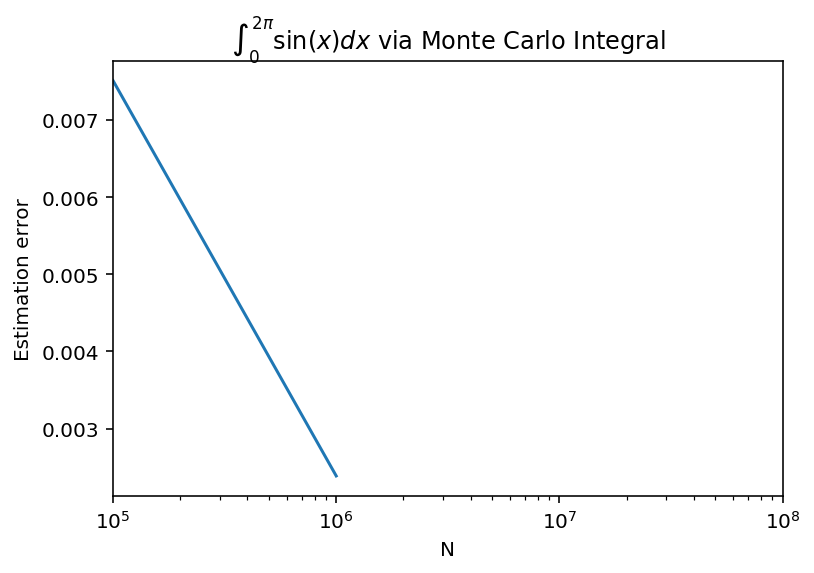

In [5]:
Ns = [10**i for i in range(5,7)]
Is = [estimate_integral(np.sin, 0, 2*np.pi, n) for n in Ns]
plt.semilogx(Ns,Is)
plt.title(r"$\int_0^{2\pi}\sin(x)dx$ via Monte Carlo Integral")
plt.xlabel("N")
plt.ylabel("Estimation error")
plt.xlim(10**5,10**8)
plt.show()

It does in fact converge eventually. Though this method is vastly less efficient than the trapezoid rule we have been using deterministically in 1D, it turns out that for higher dimensional integrals (like 10D) this stochastic technique can substantially outperform similar deterministic strategies.

## Random Walks

Where Monte Carlo methods really shine is in approximating behavior that is common in thermodynamics. For example, the air molecules in a room collide with each other constantly, effective jostling each other into random bits of short motion between collisions. Similarly, the molecules in a solid like a table vibrate and randomly exchange packets of energy as they essentially bump into each other - these packets of energy flow through the solid in the form of heat.

If we don't care much about the details of the motion, but want to capture the overall effects of the random jostling, we can simulate random walks of particles.

As a simple example, the following code places 100 particles at the origin of a 2D plane, then has them randomly walk around by taking integer steps in one of the four cardinal directions (E, W, N, S). The resulting animation shows their motion over time.

In [6]:
g = rw.walk_gen(walkers=100)

In [7]:
rw.plot_anim(g, xlim=(-50,50), ylim=(-50,50), max_frames=200)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAGdlm1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTQ4IHIyNjQzIDVjNjU3MDQgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE1IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9NiBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAAWpZYiE
ADP//vbsvgU1/Z/QlxEsxdpKcD4qpICAdzTAAAADAAB4HShe6DhKq9DAABvIzcIk3f+ABLO++E67
pBhendidMhig5WmV6h73lqDj7Mh1OsrP9f35GBGKX23n8bzqT7oTWwNaVDGHQZS1Tk42Zt8BMtTD
twpUXrXmNVJNC2SyLhfqlPF65cdQsGzFpMNaBJESVb8QxBvWgQUMZbvilb+VYoQUbuQlR0ET/4rY
TY9eXMjCwRyIVgg6Sj6hr7uNdBumu2p7hDRQAEnUEDh87papwAmwgxaOFP1Hx1s/P4JY1Mn2//A0
soxfSsfTj9lXwG4TxtIKw8Dfd0WKLHQUDzDpLJIBgNnDim7CXJ57bCMV0vhmAnRD7r5PpQp+PbhK
2w67nflvWH6oVE8n6ghcpm9FjRt8pG8iYECzH5vrFEXWLOJ1XsaBxwJZNrxZr4nyXBHl+1Z2PqW+
8pyb9xHsXeqKkS0in8HcWlTDSNvshwhe4zMM7OxcFzn+xmh22cLzpaOI/kim/ohGEQvuB5Twhg2i
B0Ka4dkqLoNDfazF84cShMu3UEzt9AVwJ60V3wMd1QBkmJvocBwpU8JjKjcXJ811wneJpixnv3lJ
GpzSSogDTMEKeHJ9kh/mFtgVSIpRUbIydgUk/I0adinCqCXn0vNFXEYOlT4cKoVCyFvWfpxZkvOZ
ILlhFHIasYBWrM6EqdtukTymMQzSTcf36uTlLbHd06I/AQePGAi1KVIib8xgGV4HcsoZH7ALHUaZ
vFYgPQJwrJrXSWgLQ8HvefS+oERun1/eKzOSmIQwHdF8tbSgcezfM0VjSylPAsJOB+Dg96asXFfc
gN6I9cB9kvtPt/o8+uh/r/Dr4QglLYSxr0C1150pSrUxebUk8X53yLfG5FW6wACOgAHxGhKscA95
8e+S+gg0ftqav/Qtvc0i7MWU9/GfFznOQhoRhm60XoOiFxrPAFPd4ipWV5qzPZ2vk2HOw8IdFRyV
t4P+8DUV8x3MKD9o283SnrVb98HwHxRW55OAbr5aX0ULtdR61Rq1Gc+L981cB9o0r/GQ18Y1wgwa
G6ctc6XvFF54Q6oCCrFLxGbPTu9xLoU2IPJZAydBEIVgKZkpuXpuenqLypSbdLMP06pKZuebDIb0
/YjNlRx2TOhwBAeKMfWF5U6SGzNvIpsfkpeBPuiye2lEGNOqU6BHmE64ffGVoFSxyeBVfVEhm3D5
wvyfGLDcZnReHUGF2zFEPITcmMaPp8qagUzTgh7JeOxcas/T0sU7M+GLgi1j1YnfAqOIL97vqNqE
cvLRI5y2BUjj3SzYP1pXwjfJlUGcoj0rAYRJ2/VJs6xFyRo8vMwc5A5pkYfc59fcIK3p1tnKxe1r
VAGtiY22OjXOFvP7KXWKiwzxEHZldN1+rduk5NpHZnFuuPY0jlP8w6S4slyQK6poqzjPFI0KSKtl
yrJG7DexrJiTAiuL/IrN6L6hChYhi5gQAc5B6ryBPj89RUkw5qV1+UjWBIm/R3oWeXueobzaBFwi
11AMgxe2c1pd8vqlQfMi41Tl7fY/fmjeZwBTpTa5EuQ/IMnMCm3a7Uip/Spbik0O7vFQHaDMBpPn
HSdbhMVBpkBEdt3FtW/B4ez2o/tcZ2OFKaWsVtoHZsNGxdQ46uTpyE3bSF5JiURHzc54R5CYPjLC
/IH7ezZNsIoMN/0ov/fIz5tNmS6MKLhtIvLUzqqtctRSKR6nPzse4CnT1uQMrslLYR9oxskmbQAb
JZPar4cL24Qr8CUZMHw4X57F88p/HWQqoCBy5gILEMdeOmmfmmsDJSgKyy/vi9rIr+brlWkeFw55
EGvmxSvvQ8iIA9MfFBTbnxKeYQ7i0cMoFHdKV/gmwsgZxCNl+oGXiYefL/fS4rO8loW0s5XdRqM3
+KMYsN53G98GgtsgDaq/QagJvNxRAAABdUGaJGxDP/6eEGdsdzplel6qwgWgEwymrfMKSvz7Xfyl
J6lz7YpXccd00TgZT2mtrP2amFIyg+aReVRO94eC/snT9WYhqpnTdovn21TLxa6cZ+vLx/H+BH/f
qUsB4DWvoCgYlNlOv2TD1dS/L+5D7AOmYoOS+qXmR2GmJxppQzHswyN3yq6rqLa5sMZa9AYXZNVC
pFZ3C7b+9SE+CUVEAWVasFbzjwu7b61LSRAAmLLdIYfdVW8FQTA7SqFc+Vvw48xpHbOKc+ibrEnx
YJnArJxL1YKfSziz0f+zGMvWKWq5hwDfw/Y4+QyZADZ9shln8/izXh5554dG281FIy2xm82ZKSEb
QyiNWlB00/tyKO8vZlUCzae9yoULJGIvBUhIVquOSn7hAedQgrFtIDSeHufNnrGlZHYCrCIesGY5
yrRVBua69TRSv/Z0y8Zsxtf0VMZRPQ2ENMfyyE6bdCyr2hzEpoT09Vfk/XeCdDwVLUyY1NuF88YA
AACbQZ5CeIR/BH3XXWpbbqRK+QtYeL4LzNgxmHFIrA06WARvah3PMMnIPPMH+tJvMZse9iBU66pV
AZLRGa2pXpAjLAAJ2yvP8cDjcgplcPGy78cDugcxsjhhS0Q1ceO+XzHfUc0kAURSNvyLLdBiT1zs
9zcq7TCGxoVCW/ibjzar6Ag297POZZj9oM4pCDE1zCgM5crTicZst+xN7MEAAABQAZ5hdEf/B+vM
QeRaLy/7AAADAABtEnaplg7/lQfUAIuV1Zkg/x0AE030sxMTav2bRCGXnfkmHGIRcw6aOIFBdTVt
xBtlfqT+KWjCmpNANCAAAABqAZ5jakf/B+27qsCv60N6bCQAAAMAUQlMsIHoJUQP5VA4AAbFBAyV
uyaGuRDyMXQhobS8lK45fxSkl5HqfnX5VLTntJVPKpeF3tdRlyzc1+bKyEsGn2QZJFluBUgzzgqW
bSQ5qodGQEEjgQAAATBBm

## Exercise

Create a new random walk generator that prevents the particles from passing through a box with walls at $x=-20,20$ and $y=-20,20$.  To make things interesting, place a hole in your box at $x=20$ for the range $y\in[-4,4]$ such that particles can wander freely in that region of the hole as before.  Make sure particles outside the box and inside the box cannot move through the box walls, but otherwise move freely.  Modify the animation function so that the initialization frame draws the boundaries of your box in addition to the particles.

In [10]:
g2 = rw.new_walk_gen(walkers=100)

In [11]:
rw.new_plot_anim(g2, xlim=(-50,50), ylim=(-50,50), max_frames=200)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAGdRG1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTQ4IHIyNjQzIDVjNjU3MDQgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE1IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9NiBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAAZWZYiE
ADP//vbsvgU1/Z/QlxEsxdpKcD4qpICAdzTAAAADAAB4HShe6DhKq9DAABvIzcIk3f+ABLO++E67
pBhendidMhig5WmV6h73lqDj7Mh1OsrP9f35GBGKX23n8bzqT7oTWwNaVDGHQZS1Tk42Zt8BMtTD
twpUXrXmNVJNC2SyLhfqlPF65cdQsGzFpMNaBJESVb8QxBvWgQUMZbvilb+VYoQUbuQlR0ET/4rY
TY9eXMjCwRyIVgg6Sj6hr7uNdBumu2p7hDRQAEnUEDh87papwAmwgxaOFP1Hx1s/P4JY1Mn2//A0
soxfSsfTj9lXwG4TxtIKw8Dfd0WKLHQUDzDpLJIBgNnDim7CXJ57bCMV0vhmAnRD7r5PpQp+PbhK
2w67nflvWH6oVE8n6ghcpm9FjRt8pG8if99hE4DA8etUgeNM/GoTg/s00RyBBOQwXE7Rygg8q0sj
4EWnhwrQ/VlP1i9+Dbuz+3DfcQG/M0FvmUraEa97CAHl33rvMBYuPGyNjH3PImh4hIb/vSW+gjE6
FiP/oD5K0dyjRnJVSetJybovpMwSJaRUC3YBGUEug2prbCcEtTUk7+DUBJnt8KO957qV4fzxnoGw
KZ+q7d9RM8WH83A36h0Kwr1bMEO8jFQzDM8i1VWxfn6YX2K7Rw2FKKeLlPi/dIfYntybd+oO7B14
Xp4IT6Cd9VkP6/+Hx5DrYncl/KgOD06A4EleTzWwRvIWvBq8/eaVwpw0tHjojsKLuy2AYztAdueh
6dSEwp9AMNiaJDpMC/+8ANvBFoNu+w0YT3sGaLa5tHyVzzBZdgCcP2d9MWUmGbc0SDcCPhBMfbd8
FHxS3PxVkGcd+CqhQ6mmIqgvAMHZUtcqpvff7ieN6Rc0bycgbUebk6dM/iqRRChtbPurUFsXCFaO
EN08ZD+PPbPJiqgIqZP+x/Db5G5K7cUB5amXWHC45EJ9VRZEI4onpV2wcUHCkgcezaJ9wBSylPB1
azWeD5Gq3rwULLyOaUrA4CI3FOH6gC16x9vw6dEIJS2Esa9AtdedKUq1MXm1JPF+d8i3xuRWOJuO
JsG1ABYvsYt9XGPnEAnamR1YEajEsDAfxGowuYAusqMdSBsTDg5LdsAAAAMB+R2GrlRbuip9nOTl
H+RV+/2JP0X7NqgaXa/IB7PUuCJWUsNfcPxli9jFgLC0ZMEQ9jiAdPaGK69zZX7pxHUuFA3fGo9Z
4qPXY9P1TNW24geAXu5h8XXLmbLgG6+Wk1TGkVgI+Jl624ElS+6QyX6/gypy1FW+iDBkLnFjOme8
UXnhZxfLwgCcf0LdiR5Sko5NBnD5nghIeTPUt9n34AWLiHmt3guijIRBpUpNulmH6dUlM3oRNFPc
XwsYNgWvqxfgdGf1Jp+U+PNQNN//DyH1MU2Su8U8VyOOPqA19EGNOqMZrq80+lw/fT/PNX92ljtU
dEhm3D5wvyfGK44/j6btEahNA5u7Fax8GBqNVvWSjQ9U5zOxcas+Br0w9MqIKXQ5OOGXGqdRrxFv
d9RtQjl5aHX1hzfYKGDjEfvWlfCN8mVQZw+7Xz5rz11Mm/9rEXJGjzH1RzkDmmRh9wxEdwgrenW2
crEQPSnetEj4PXUCAXCuY6WnNhcIkDCBFxmByLKnxFbAf9uLveBwZgaT58OwrJUMSBXVQjq4Od8F
V9X9w905WqXRXypjwh0fwQ8is3nlqEKFiGLmBACInXqvIE+Pz1FSQjmpXX5SNYEiYYin0H2LrB9u
qgYBqIEXDCzw7ZzWl3EeuGJ8yLjVOXt/L2dXO3LVMlkNNXoRGeL+x487d1mWt+NCVt+4w7u8VAdo
M0MQ3FDHJ9fIA03bF7SygUzmudjdNT3RDTDf4UpnKhW/1j6Q0ciHGArwH4Qm7aQvJMSidGbnPCPI
TB8ZYX6IKqE7W8TQu/16UX/rSw+6y1IkPsFvlMWS6AqLl8/RSKRHfPnY9wFOnrcgaXZKWwj7RjZJ
mKGA2Sye1Xw4Xvg/7R5La+o8vl5sVI6JsBtcq9iBy5gILEMdeO29ExwdIFN0rOr/vi9rJGODrlWk
eFw55D4iaKmrvQ8iIBMqcVBTbnxKeYP5i0cMoFHdKV64mPFzgqEbL9OEUEw8+X++lxMd5LQtpZyu
6jVBf7wYxYdMrGr4NaeDpjgDO37v71kAAAFnQZokbEM//p4QZ2x3OmV6XqrCBaATDKat8wpK/Ptd
/KUnqXPtildxx3TROBlPaa2s/ZqYUjKD5pF5VE73h4L+ydP1ZiGqmdN2i+fbVMvFrpxoiifEACp2
R5HtUYrhrKpJfJk7pKTgECkuscfHOK795d8NeRL/LGhIFF+eHGbpAeCGuxBZNuQPTbzQKcL/bQBQ
l1r2NavXXLQgtv42nqhQrxq9+JemBYPAL/R3yMU1zB/EZnp/l31O1xUtQWcq2/DhU9Gv5CUHy8kb
dMCNCALYgeJ9KBB6e3fIPPStV8sZYx8j+IVIsCUEqE/Zoq0S/B5RmQiN7OdTSRfKl1s5l3JtlOA9
krOJiMpI8tibBtI/0+8OeS986kZuWPAShndo6bzXLmeNJPdulUjhabMjIS750H1PmtV8fzKh+mGi
z94jMgqu45WnfM9NpOeLnuUomTIZXitTus05HHtf62v/+A2g7Bkh9jXKrhAAAACMQZ5CeIR/BH3X
XWpbbqRK+QtYeL4LzNgxmHFIrA06WARvah3PMMnIPPMH+tJvMZse9iBU66pVCqoz+bmyPAOK4yC0
8AAnGo2znCXJ5/9EQcUVityK1JooFQ0HANg3U8RvlxWSPB3/WAZ/fcnD1UPg9ypurtXQ6UYN0oeL
8YCZIhm/Sg80EoGlMdMvHbEAAABIAZ5hdEf/B+vMQeRaLy/7AAADAABtEnaplmkGvGeZAE0syANH
YAHcFvXjPm8WWY4Z97kLK